In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [3]:
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float32))
X_test = scaler.transform(X_test.astype(np.float32))

In [5]:
%%time 
est = linear_model.SGDClassifier(learning_rate='invscaling', eta0 = 1.0)
est.fit(X_train, y_train)
print("Accuracy", est.score(X_test, y_test)) # accuracy score

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy 0.9153
CPU times: user 3.96 s, sys: 196 ms, total: 4.16 s
Wall time: 4.13 s


In [8]:
X_train.shape

(60000, 784)

In [9]:
pca = decomposition.PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

([], <a list of 0 Text xticklabel objects>)

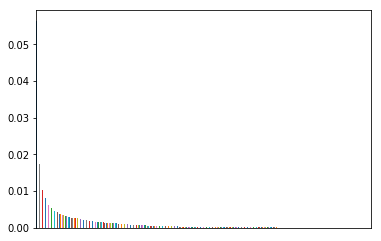

In [14]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
plt.xticks([])

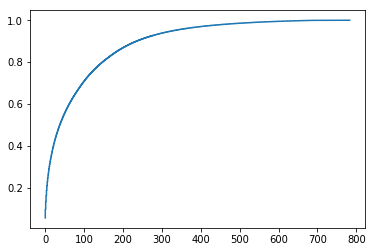

In [17]:
ratios = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(len(ratios)), ratios)

In [20]:
pd.DataFrame({"ratios": ratios}).query("ratios>0.99").head()

,ratios
542,0.990089
543,0.990183
544,0.990277
545,0.990370
546,0.990462


In [21]:
pca = decomposition.PCA(n_components=542)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
%%time 
est = linear_model.SGDClassifier(learning_rate='invscaling', eta0 = 1.0)
est.fit(X_train_pca, y_train)
print("Accuracy", est.score(X_test_pca, y_test)) # accuracy score

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy 0.9153
CPU times: user 2.74 s, sys: 171 ms, total: 2.91 s
Wall time: 2.88 s


In [23]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,532,533,534,535,536,537,538,539,540,541
0,-0.922077,-4.814824,0.067720,-8.051362,-0.985315,0.951644,0.336126,1.393484,1.052384,2.324290,...,0.011903,-0.223845,-0.051241,-0.235056,-0.176529,0.502192,0.073572,0.311648,-0.241928,0.540591
1,8.709081,-7.754529,-3.447880,-1.668144,0.834700,-5.144719,-0.272354,3.135481,0.198311,-1.196246,...,0.074832,0.246880,-0.220078,0.314722,-0.020545,0.098063,-0.395385,-0.086603,-0.000631,-0.438935
2,2.328347,9.431287,-6.184299,1.725115,4.092257,2.291446,18.691465,3.992522,-2.169755,-0.150898,...,-0.335323,0.204796,0.549142,-0.208241,-0.191832,-0.227294,0.332440,-0.121349,-0.132739,0.363220
3,-6.582146,-3.746340,3.690898,-0.461091,5.627491,3.461557,1.561363,-4.600488,0.624911,-2.617161,...,-0.043230,-0.067011,-0.105644,-0.195644,-0.092004,-0.077914,0.146613,0.033517,-0.447285,-0.224670
4,-5.183256,3.133200,-6.277988,1.459608,-1.608764,-0.612642,-0.580039,-3.205917,-0.012976,-0.699070,...,-0.276221,0.148637,-0.144196,0.542115,0.123208,-0.053291,0.245252,-0.569048,0.151805,0.157598
5,2.198407,-3.068349,-0.231237,2.752614,-1.216957,5.791328,-0.693746,0.335569,0.786445,-1.945879,...,0.094705,-0.227367,-0.043301,0.345166,-0.263116,-0.190083,-0.179427,0.146887,0.217655,0.229199
6,-6.773342,0.823100,2.932368,0.988583,1.460369,-4.947651,-0.142978,0.972200,0.527837,-0.248252,...,0.191414,0.035592,-0.084339,0.104461,0.131574,-0.351181,-0.014720,-0.017679,0.222658,-0.315747
7,1.926923,-5.406261,-0.162985,-11.153116,-5.003696,5.101918,0.559680,-1.926746,4.230101,1.010062,...,-0.153037,0.026462,0.007935,0.025606,-0.030968,-0.384869,-0.236942,-0.268470,-0.346447,-0.453395
8,-7.822330,0.191802,1.100149,1.559601,4.221253,-5.094369,0.625059,0.417190,0.070414,1.069007,...,0.120593,-0.049023,-0.066301,-0.047797,0.096729,-0.008183,0.202110,0.059421,0.158022,0.012399
9,-3.227609,-4.726471,-4.288946,3.631196,-0.712069,3.527622,2.536013,-2.093016,-3.565193,5.520559,...,0.287571,-0.187641,-0.017872,0.020877,0.102747,-0.070506,0.292509,0.186295,-0.308262,-0.067923


In [24]:
X_train_inv = pca.inverse_transform(X_train_pca)

In [25]:
X_train_inv.shape

(60000, 784)

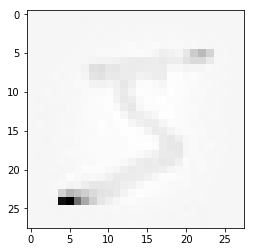

In [27]:
plt.imshow(X_train_inv[0].reshape(28, 28), cmap="Greys")